UCT Internship Project - Smart City

Forecasting of Smart City Traffic Patterns

We are working with the government to transform various cities into a smart city. The vision is to convert it into a digital and intelligent city to improve the efficiency of services for the citizens. One of the problems faced by the government is traffic. You are a data scientist working to manage the traffic of the city better and to provide input on infrastructure planning for the future.

The government wants to implement a robust traffic system for the city by being prepared for traffic peaks. They want to understand the traffic patterns of the four junctions of the city. Traffic patterns on holidays, as well as on various other occasions during the year, differ from normal working days. This is important to take into account for your forecasting.

Dataset Link - https://drive.google.com/file/d/1y61cDyuO9Zrp1fSchWcAmCxk0B6SMx7X/view?usp=sharing


Summary of the Whole Code -

1. Data Loading and Preprocessing:
The code starts by importing required libraries, including data
manipulation (NumPy, Pandas), visualization (Matplotlib, Seaborn), time handling (datetime), and machine learning tools (scikit-learn).
It reads two datasets, dfTrain and dfTest, containing traffic-related data.
The datetime columns are converted to datetime objects for both train and test datasets using pd.to_datetime.

2. Feature Engineering:
New features are created from the datetime information for both train and test datasets. These features include 'Weekday', 'Year', 'Month', 'Day', 'Time', 'Week', and 'Quarter'.
Time-series plots are generated using Seaborn to visualize the relationship between datetime and vehicle count for different junctions.

3. Visualization:
A time-series plot illustrates the variation of vehicle counts over time, with different colors representing different junctions.
Another visualization shows the distribution of vehicle counts across different years for each junction.

4. Feature Transformation:
A function named datetounix1 is defined to convert datetime objects to Unix timestamps (seconds since epoch). This function is applied to both train and test dataframes.

5. Data Preparation:
Data is prepared for modeling by storing predictor features in the 'X' array and the target variable 'Vehicles' in the 'y' array.
One-hot encoding is applied using Pandas' get_dummies function to convert categorical variables into binary columns.

6. Train-Test Split:
The dataset is split into training and testing sets using train_test_split, with a test size of 33% and a specified random seed.

7. Random Forest Regressor:
A Random Forest Regressor model is created with 100 estimators (trees) and a random seed of 42.
The model is trained on the training data using the fit method.

8. Model Evaluation:
Predictions are made on the test set using the trained model.
Evaluation metrics are calculated, including Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared (R2) score.
The evaluation metrics are printed to assess the model's performance.

Import Required Libraries

In [82]:
#Importing Required Libraries/Modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import time

from datetime import datetime

from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.ensemble import RandomForestRegressor

In [59]:
#Reading the Datasets
dfTrain=pd.read_csv("train_aWnotuB.csv")
dfTest=pd.read_csv("test_BdBKkAj.csv")

In [60]:
dfTrain.head()

DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041

In [61]:
dfTrain.tail()

DateTime  Junction  Vehicles           ID
48115  2017-06-30 19:00:00         4        11  20170630194
48116  2017-06-30 20:00:00         4        30  20170630204
48117  2017-06-30 21:00:00         4        16  20170630214
48118  2017-06-30 22:00:00         4        22  20170630224
48119  2017-06-30 23:00:00         4        12  20170630234

In [62]:
dfTest.head()

DateTime  Junction           ID
0  2017-07-01 00:00:00         1  20170701001
1  2017-07-01 01:00:00         1  20170701011
2  2017-07-01 02:00:00         1  20170701021
3  2017-07-01 03:00:00         1  20170701031
4  2017-07-01 04:00:00         1  20170701041

In [63]:
dfTest.tail()

DateTime  Junction           ID
11803  2017-10-31 19:00:00         4  20171031194
11804  2017-10-31 20:00:00         4  20171031204
11805  2017-10-31 21:00:00         4  20171031214
11806  2017-10-31 22:00:00         4  20171031224
11807  2017-10-31 23:00:00         4  20171031234

Shape of the Datasets

In [64]:
print("Shape of Dataset -",dfTrain.shape)
print("Shape of Dataset 2 -",dfTest.shape)

Shape of Dataset - (48120, 4)
Shape of Dataset 2 - (11808, 3)


Data Info.

In [65]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Based on the above information we conclude that there are No Null values in any columns of the Train Dataset.

In [66]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


Based on the above information we conclude that there are No Null values in any columns of the Test Dataset.

Data Description

In [67]:
#Summary Statistics of the Train Data
dfTrain.describe()

Junction      Vehicles            ID
count  48120.000000  48120.000000  4.812000e+04
mean       2.180549     22.791334  2.016330e+10
std        0.966955     20.750063  5.944854e+06
min        1.000000      1.000000  2.015110e+10
25%        1.000000      9.000000  2.016042e+10
50%        2.000000     15.000000  2.016093e+10
75%        3.000000     29.000000  2.017023e+10
max        4.000000    180.000000  2.017063e+10

In [68]:
#Summary Statistics of the Test Data
dfTest.describe()

Junction            ID
count  11808.000000  1.180800e+04
mean       2.500000  2.017087e+10
std        1.118081  1.124665e+05
min        1.000000  2.017070e+10
25%        1.750000  2.017073e+10
50%        2.500000  2.017083e+10
75%        3.250000  2.017100e+10
max        4.000000  2.017103e+10

Converting DateTime column to DateTime

In [69]:
#Converting Data Type to DateTime for both Train and Test Data
dfTrain['DateTime'] = pd.to_datetime(dfTrain['DateTime'])
dfTest['DateTime'] = pd.to_datetime(dfTest['DateTime'])
print("Train Info. -")
dfTrain.info()
print("\n")
print("Test Info. -")
dfTest.info()

Train Info. -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


Test Info. -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  11808 non-null  datetime64[ns]
 1   Junction  11808 non-null  int64         
 2   ID        11808 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 276.9 KB


Feature Engineering

Extracting the Important Features...

In [70]:
##Creating Features from DateTime for Train Data
dfTrain['Weekday'] = [datetime.weekday(date) for date in dfTrain.DateTime]
dfTrain['Year'] = [date.year for date in dfTrain.DateTime]
dfTrain['Month'] = [date.month for date in dfTrain.DateTime]
dfTrain['Day'] = [date.day for date in dfTrain.DateTime]
dfTrain['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in dfTrain.DateTime]
dfTrain['Week'] = [date.week for date in dfTrain.DateTime]
dfTrain['Quarter'] = [date.quarter for date in dfTrain.DateTime]

In [71]:
#Creating Features from DateTime for Test Data
dfTest['Weekday'] = [datetime.weekday(date) for date in dfTest.DateTime]
dfTest['Year'] = [date.year for date in dfTest.DateTime]
dfTest['Month'] = [date.month for date in dfTest.DateTime]
dfTest['Day'] = [date.day for date in dfTest.DateTime]
dfTest['Time'] = [((date.hour*60+(date.minute))*60)+date.second for date in dfTest.DateTime]
dfTest['Week'] = [date.week for date in dfTest.DateTime]
dfTest['Quarter'] = [date.quarter for date in dfTest.DateTime]

In [72]:
dfTrain

DateTime  Junction  Vehicles           ID  Weekday  Year  \
0     2015-11-01 00:00:00         1        15  20151101001        6  2015   
1     2015-11-01 01:00:00         1        13  20151101011        6  2015   
2     2015-11-01 02:00:00         1        10  20151101021        6  2015   
3     2015-11-01 03:00:00         1         7  20151101031        6  2015   
4     2015-11-01 04:00:00         1         9  20151101041        6  2015   
...                   ...       ...       ...          ...      ...   ...   
48115 2017-06-30 19:00:00         4        11  20170630194        4  2017   
48116 2017-06-30 20:00:00         4        30  20170630204        4  2017   
48117 2017-06-30 21:00:00         4        16  20170630214        4  2017   
48118 2017-06-30 22:00:00         4        22  20170630224        4  2017   
48119 2017-06-30 23:00:00         4        12  20170630234        4  2017   

       Month  Day   Time  Week  Quarter  
0         11    1      0    44        4  
1         11    1   3600    44        4  
2         11    1   7200    44        4  
3         11    1  10800    44        4  
4         11    1  14400    44        4  
...      ...  ...    ...   ...      ...  
48115      6   30  68400    26        2  
48116      6   30  72000    26        2  
48117      6   30  75600    26        2  
48118      6   30  79200    26        2  
48119      6   30  82800    26        2  

[48120 rows x 11 columns]

In [73]:
dfTest

DateTime  Junction           ID  Weekday  Year  Month  Day  \
0     2017-07-01 00:00:00         1  20170701001        5  2017      7    1   
1     2017-07-01 01:00:00         1  20170701011        5  2017      7    1   
2     2017-07-01 02:00:00         1  20170701021        5  2017      7    1   
3     2017-07-01 03:00:00         1  20170701031        5  2017      7    1   
4     2017-07-01 04:00:00         1  20170701041        5  2017      7    1   
...                   ...       ...          ...      ...   ...    ...  ...   
11803 2017-10-31 19:00:00         4  20171031194        1  2017     10   31   
11804 2017-10-31 20:00:00         4  20171031204        1  2017     10   31   
11805 2017-10-31 21:00:00         4  20171031214        1  2017     10   31   
11806 2017-10-31 22:00:00         4  20171031224        1  2017     10   31   
11807 2017-10-31 23:00:00         4  20171031234        1  2017     10   31   

        Time  Week  Quarter  
0          0    26        3  
1       3600    26        3  
2       7200    26        3  
3      10800    26        3  
4      14400    26        3  
...      ...   ...      ...  
11803  68400    44        4  
11804  72000    44        4  
11805  75600    44        4  
11806  79200    44        4  
11807  82800    44        4  

[11808 rows x 10 columns]

Drop Duplicate Rows in Train Data

In [74]:
#Here, the keep="first" parameter will keep the first occurrence of each duplicated value and removes subsequent occurrences.
#And, the parameter inplace=True will help in changing things directly in the Dataset.
dfTest.drop_duplicates(keep="first", inplace=True)

Drop Duplicate Rows in Test Data

In [75]:
#Here, the keep="first" parameter will keep the first occurrence of each duplicated value and removes subsequent occurrences.
#And, the parameter inplace=True will help in changing things directly in the Dataset.
dfTest.drop_duplicates(keep="first", inplace=True)

Data Visualization

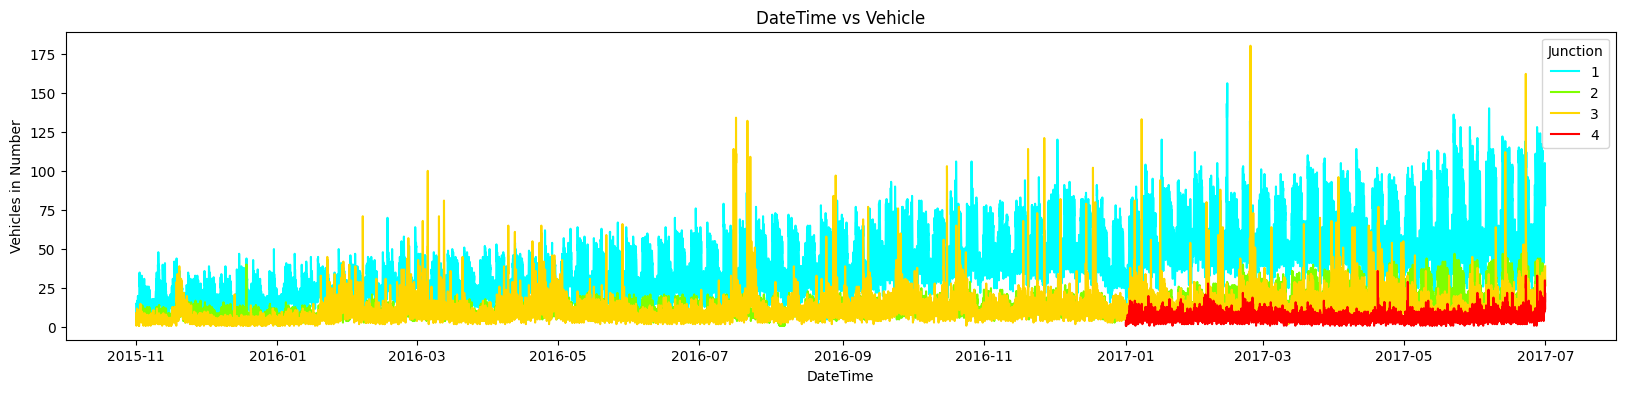

In [76]:
#Time-Series Plot
colors = ["cyan","chartreuse","gold","red"]
plt.figure(figsize=(20,4))
time_series=sns.lineplot(x=dfTrain['DateTime'],y="Vehicles",data=dfTrain, hue="Junction", palette=colors)
time_series.set_title("DateTime vs Vehicle")
time_series.set_ylabel("Vehicles in Number")
time_series.set_xlabel("DateTime")
plt.show()

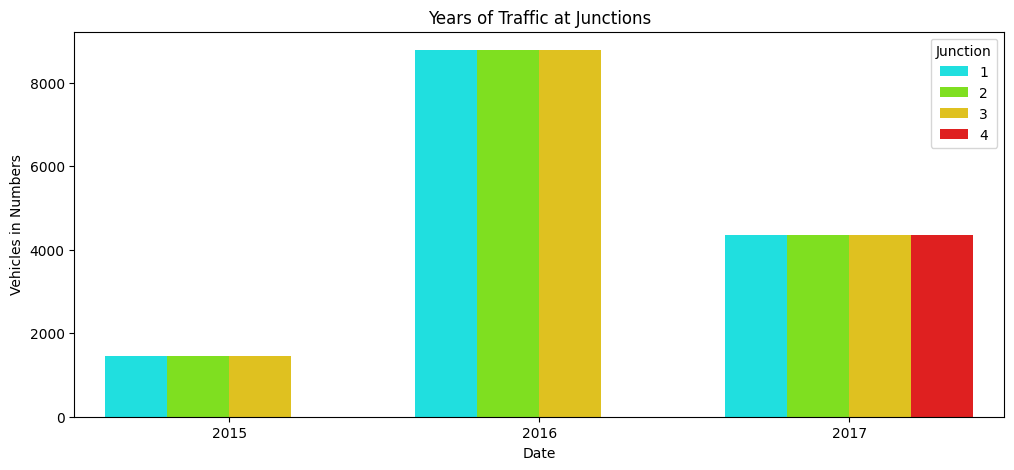

In [77]:
#Years of Traffic at Junction
plt.figure(figsize=(12,5))
colors = ["cyan","chartreuse","gold","red"]
count = sns.countplot(data=dfTrain, x =dfTrain["Year"], hue="Junction", palette=colors)
count.set_title("Years of Traffic at Junctions")
count.set_ylabel("Vehicles in Numbers")
count.set_xlabel("Date")
plt.show()

Split the Train data

In [78]:
def datetounix1(df):
    #Initialising unixtime list
    unixtime = []

    #Running a loop for converting Date to seconds
    for date in df['DateTime']:
        unixtime.append(time.mktime(date.timetuple()))

    #Replacing Date with unixtime list
    df['DateTime'] = unixtime
    return(df)

In [79]:
train_features = datetounix1(dfTrain.drop(['Vehicles'], axis=1))
test_features = datetounix1(dfTest)


#Store Features/Predictors in an Array
X = train_features
X_valid = test_features

#One Hot Encoding - Using Dummies
X = pd.get_dummies(X)
X_valid = pd.get_dummies(X_valid)

#Store target 'Vehicles' in y array
y = dfTrain['Vehicles'].to_frame()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=512)

Random Forest Regressor

Random Forest is an ensemble learning method that builds a collection of decision trees and combines their predictions to produce a more accurate and stable result. It's commonly used for regression and classification tasks.

In [80]:
#Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the model
rf_regressor.fit(X_train, y_train)

#Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

<ipython-input-80-7f77fcdfeef2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


In [81]:
#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#Printing the Evaluation Metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 15.754391007556675
Mean Absolute Error: 2.5027191435768263
R2 Score: 0.964251706381076


Pandas Profiling

This Library refers to a Python package that generates interactive profile reports from a Pandas DataFrame. These reports provide valuable insights and summaries about the data contained within the DataFrame, helping data analysts and scientists to understand their data quickly and efficiently.

The Pandas Profiling library automatically computes various statistics and visualizations for each column in the DataFrame, including:

1. Basic statistics: This includes information like the number of missing values, unique values, mean, median, standard deviation, etc.
2. Common values: The most common values in a column.
3. Histograms: Visual representations of the distribution of data in each column.
4. Correlation matrix: A matrix showing the correlation between numerical columns.
5. Missing values: Visual representation and summary of missing data.
6. Sample of data: A preview of the actual data in the DataFrame.
7. Interactions: Visualizations of interactions between pairs of columns, showing scatter plots or other relevant visualizations.
8. Warnings: Alerts about potential issues in the data, like high cardinality, constant values, etc.

In [83]:
#Pandas Profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 22.6 MB 8.0 MB/s 0:00:03
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 23.9 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357350 sha256=bbaebb6d2555fa0fb6e1b74763b3fefafb2b247efc3ffd7bb96a730f153a5cb6
  Stored in directory: /tmp/pip-ephem-wheel-cache-l9fndopj/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=1b26bb00f54b44e2a3ebffe9694fc4c3f7606b296274c26a952bb2d895fa1a8b
  Stored in directory: /root/.

In [84]:
from pandas_profiling import ProfileReport

<ipython-input-84-e2a33329b6f0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [85]:
#Profile Report for Train Data
train=ProfileReport(dfTrain)
train

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [86]:
#Profile Report for Test Data
test=ProfileReport(dfTest)
test

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]